# 1.1. Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.\
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.\

Описание тарифов: 
- Тариф «Смарт»
    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        1) минута разговора: 3 рубля
        2) сообщение: 3 рубля
        3) 1 Гб интернет-трафика: 200 рублей
- Тариф «Ультра»
    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        1) минута разговора: 1 рубль
        2) сообщение: 1 рубль
        3) 1 Гб интернет-трафика: 150 рублей
        
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

# 1.2. Инструкция по выполнению проекта

Шаг 1. Приведите данные к нужным типам;\
Найдите и исправьте ошибки в данных.\
Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.

Шаг 2. Посчитайте для каждого пользователя:
1) количество сделанных звонков и израсходованных минут разговора по месяцам;
2) количество отправленных сообщений по месяцам;
3) объем израсходованного интернет-трафика по месяцам;
4) помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Шаг 3. Проанализируйте данные\
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Шаг 4. Проверьте гипотезы\
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;\
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;\
Пороговое значение alpha задайте самостоятельно.\
Поясните:\
как вы формулировали нулевую и альтернативную гипотезы;\
какой критерий использовали для проверки гипотез и почему.


# 1.3. Описание данных

- Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя\
first_name — имя пользователя\
last_name — фамилия пользователя\
age — возраст пользователя (годы)\
reg_date — дата подключения тарифа (день, месяц, год)\
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)\
city — город проживания пользователя\
tariff — название тарифного плана\
- Таблица calls (информация о звонках):
id — уникальный номер звонка\
call_date — дата звонка\
duration — длительность звонка в минутах\
user_id — идентификатор пользователя, сделавшего звонок\
- Таблица messages (информация о сообщениях):
id — уникальный номер сообщения\
message_date — дата сообщения\
user_id — идентификатор пользователя, отправившего сообщение\
- Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии\
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)\
session_date — дата интернет-сессии\
user_id — идентификатор пользователя\
- Таблица tariffs (информация о тарифах):
tariff_name — название тарифа\
rub_monthly_fee — ежемесячная абонентская плата в рублях\
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату\
messages_included — количество сообщений в месяц, включённых в абонентскую плату\
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)\
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)\
rub_per_message — стоимость отправки сообщения сверх тарифного пакета\
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# 2.1. Загрузка данных

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
users = pd.read_csv('users.csv')
calls = pd.read_csv('calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')
tariffs = pd.read_csv('tariffs.csv')

In [101]:
print(calls.head())
calls.info()

print(internet.head())
internet.info()

print(messages.head())
messages.info()

print(tariffs.head())
tariffs.info()

print(users.head())
users.info()

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000
<class 'pandas.cor

# 2.2. Подготовка данных

In [102]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [103]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [104]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [105]:
calls.duration = np.ceil(calls.duration) 
calls.duration = calls.duration.astype('int')

In [106]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [107]:
calls['year'] = pd.DatetimeIndex(calls['call_date']).year

In [108]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [109]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet['year'] = pd.DatetimeIndex(internet['session_date']).year

In [110]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages['year'] = pd.DatetimeIndex(messages['message_date']).year

In [111]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [112]:
users['churn_date'] = users.churn_date.fillna(9999)

In [113]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,9999,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,9999,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,9999,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,9999,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,9999,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


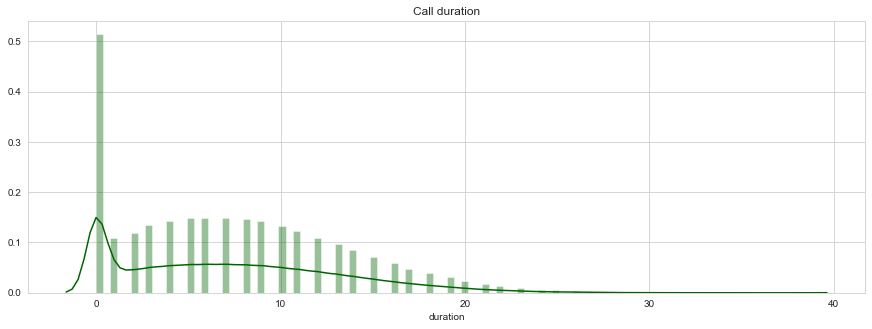

In [114]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.distplot(calls['duration'], bins=100, color='darkgreen')
plt.title('Call duration')
plt.show()

In [115]:
user_calls = calls.groupby(['user_id','year','month']).agg({'duration': ['count', 'sum']})
user_calls.columns = ['call_count', 'call_duration']

In [116]:
user_calls

call_count  call_duration
user_id year month                           
1000    2018 5              22            159
             6              43            172
             7              47            340
             8              52            408
             9              58            466
...                        ...            ...
1498    2018 10             41            247
1499    2018 9               9             70
             10             68            449
             11             74            612
             12             69            492

[3174 rows x 2 columns]

In [117]:
internet.mb_used = np.ceil(internet.mb_used) 
internet.mb_used = internet.mb_used.astype('int')

In [118]:
internet = internet.drop('Unnamed: 0', axis=1)

In [119]:
internet.head()

,id,mb_used,session_date,user_id,month,year
0,1000_0,113,2018-11-25,1000,11,2018
1,1000_1,1053,2018-09-07,1000,9,2018
2,1000_2,1198,2018-06-25,1000,6,2018
3,1000_3,551,2018-08-22,1000,8,2018
4,1000_4,303,2018-09-24,1000,9,2018


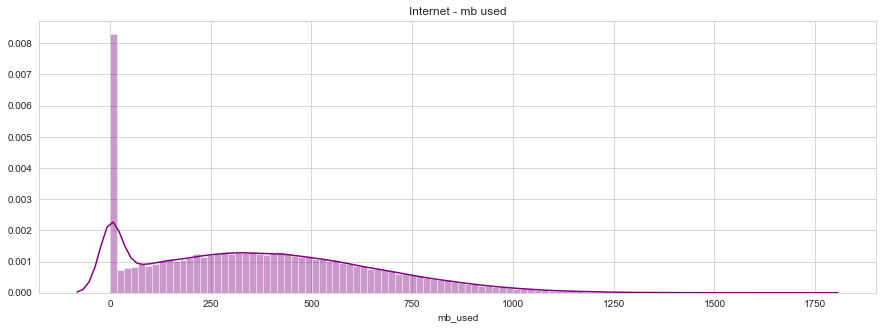

In [120]:
plt.figure(figsize=(15,5))
sns.distplot(internet['mb_used'], bins=100, color='purple')
plt.title('Internet - mb used')
plt.show()

In [121]:
user_internet = internet.groupby(['user_id', 'year','month']).agg({'mb_used': ['count', 'sum']})
user_internet.columns = ['internet_sessions count', 'mb_used']

In [122]:
user_internet

internet_sessions count  mb_used
user_id year month                                  
1000    2018 5                            5     2256
             6                           49    23257
             7                           29    14016
             8                           29    14070
             9                           27    14581
...                                     ...      ...
1498    2018 10                          59    20604
1499    2018 9                            5     1848
             10                          58    17809
             11                          49    17984
             12                          45    13077

[3203 rows x 2 columns]

In [123]:
messages.head()

,id,message_date,user_id,month,year
0,1000_0,2018-06-27,1000,6,2018
1,1000_1,2018-10-08,1000,10,2018
2,1000_2,2018-08-04,1000,8,2018
3,1000_3,2018-06-16,1000,6,2018
4,1000_4,2018-12-05,1000,12,2018


In [124]:
user_messages = messages.groupby(['user_id', 'year','month']).agg({'id': 'count'})
user_messages.columns = ['messages_count']

In [125]:
user_messages

messages_count
user_id year month                
1000    2018 5                  22
             6                  60
             7                  75
             8                  81
             9                  57
...                            ...
1498    2018 10                 42
1499    2018 9                  11
             10                 48
             11                 59
             12                 66

[2717 rows x 1 columns]

In [126]:
internet_n_calls = pd.concat([user_calls,user_internet],axis=1).reindex(user_calls.index)

In [127]:
users_info = pd.concat([internet_n_calls, user_messages],axis=1).reindex(internet_n_calls.index)

In [128]:
users_info

call_count  call_duration  internet_sessions count  \
user_id year month                                                       
1000    2018 5            22.0          159.0                      5.0   
             6            43.0          172.0                     49.0   
             7            47.0          340.0                     29.0   
             8            52.0          408.0                     29.0   
             9            58.0          466.0                     27.0   
...                        ...            ...                      ...   
1498    2018 10           41.0          247.0                     59.0   
1499    2018 9             9.0           70.0                      5.0   
             10           68.0          449.0                     58.0   
             11           74.0          612.0                     49.0   
             12           69.0          492.0                     45.0   

                    mb_used  messages_count  
user_id year month                           
1000    2018 5       2256.0            22.0  
             6      23257.0            60.0  
             7      14016.0            75.0  
             8      14070.0            81.0  
             9      14581.0            57.0  
...                     ...             ...  
1498    2018 10     20604.0            42.0  
1499    2018 9       1848.0            11.0  
             10     17809.0            48.0  
             11     17984.0            59.0  
             12     13077.0            66.0  

[3174 rows x 5 columns]

In [129]:
users_info = users_info.reset_index()
users_info

,user_id,year,month,call_count,call_duration,internet_sessions count,mb_used,messages_count
0,1000,2018,5,22.0,159.0,5.0,2256.0,22.0
1,1000,2018,6,43.0,172.0,49.0,23257.0,60.0
2,1000,2018,7,47.0,340.0,29.0,14016.0,75.0
3,1000,2018,8,52.0,408.0,29.0,14070.0,81.0
4,1000,2018,9,58.0,466.0,27.0,14581.0,57.0
...,...,...,...,...,...,...,...,...
3169,1498,2018,10,41.0,247.0,59.0,20604.0,42.0
3170,1499,2018,9,9.0,70.0,5.0,1848.0,11.0
3171,1499,2018,10,68.0,449.0,58.0,17809.0,48.0
3172,1499,2018,11,74.0,612.0,49.0,17984.0,59.0


In [130]:
full_users_info = users_info.set_index('user_id').join(users.set_index('user_id'))

In [131]:
full_users_info

,year,month,call_count,call_duration,internet_sessions count,mb_used,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,,,,,,,,
1000,2018,5,22.0,159.0,5.0,2256.0,22.0,52,9999,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,2018,6,43.0,172.0,49.0,23257.0,60.0,52,9999,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,2018,7,47.0,340.0,29.0,14016.0,75.0,52,9999,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,2018,8,52.0,408.0,29.0,14070.0,81.0,52,9999,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,2018,9,58.0,466.0,27.0,14581.0,57.0,52,9999,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,2018,10,41.0,247.0,59.0,20604.0,42.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
1499,2018,9,9.0,70.0,5.0,1848.0,11.0,35,9999,Пермь,Гектор,Корнилов,2018-09-27,smart
1499,2018,10,68.0,449.0,58.0,17809.0,48.0,35,9999,Пермь,Гектор,Корнилов,2018-09-27,smart


In [132]:
df = full_users_info.set_index('tariff').join(tariffs.set_index('tariff_name'))

In [133]:
df = df.reset_index()

In [134]:
df

,index,year,month,call_count,call_duration,internet_sessions count,mb_used,messages_count,age,churn_date,...,first_name,last_name,reg_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,smart,2018,11,59.0,430.0,55.0,18452.0,NaN,41,9999,...,Иван,Ежов,2018-11-01,50,15360,500,550,200,3,3
1,smart,2018,12,63.0,414.0,41.0,14053.0,NaN,41,9999,...,Иван,Ежов,2018-11-01,50,15360,500,550,200,3,3
2,smart,2018,6,15.0,117.0,34.0,10871.0,4.0,59,9999,...,Евгений,Абрамович,2018-06-17,50,15360,500,550,200,3,3
3,smart,2018,7,26.0,214.0,58.0,17601.0,11.0,59,9999,...,Евгений,Абрамович,2018-06-17,50,15360,500,550,200,3,3
4,smart,2018,8,42.0,289.0,60.0,20347.0,13.0,59,9999,...,Евгений,Абрамович,2018-06-17,50,15360,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,ultra,2018,8,17.0,92.0,4.0,2616.0,13.0,65,9999,...,Авксентий,Фокин,2018-08-28,1000,30720,3000,1950,150,1,1
3170,ultra,2018,9,112.0,813.0,69.0,33105.0,82.0,65,9999,...,Авксентий,Фокин,2018-08-28,1000,30720,3000,1950,150,1,1
3171,ultra,2018,10,152.0,1030.0,63.0,29393.0,82.0,65,9999,...,Авксентий,Фокин,2018-08-28,1000,30720,3000,1950,150,1,1
3172,ultra,2018,11,129.0,954.0,71.0,38972.0,79.0,65,9999,...,Авксентий,Фокин,2018-08-28,1000,30720,3000,1950,150,1,1


In [135]:
df.isna().sum()

index                        0
year                         0
month                        0
call_count                   0
call_duration                0
internet_sessions count     11
mb_used                     11
messages_count             496
age                          0
churn_date                   0
city                         0
first_name                   0
last_name                    0
reg_date                     0
messages_included            0
mb_per_month_included        0
minutes_included             0
rub_monthly_fee              0
rub_per_gb                   0
rub_per_message              0
rub_per_minute               0
dtype: int64

In [136]:
df['internet_sessions count'] = df['internet_sessions count'].fillna(0)

In [137]:
df['mb_used'] = df['mb_used'].fillna(0)
df['messages_count'] = df['messages_count'].fillna(0)

In [138]:
df

,index,year,month,call_count,call_duration,internet_sessions count,mb_used,messages_count,age,churn_date,...,first_name,last_name,reg_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,smart,2018,11,59.0,430.0,55.0,18452.0,0.0,41,9999,...,Иван,Ежов,2018-11-01,50,15360,500,550,200,3,3
1,smart,2018,12,63.0,414.0,41.0,14053.0,0.0,41,9999,...,Иван,Ежов,2018-11-01,50,15360,500,550,200,3,3
2,smart,2018,6,15.0,117.0,34.0,10871.0,4.0,59,9999,...,Евгений,Абрамович,2018-06-17,50,15360,500,550,200,3,3
3,smart,2018,7,26.0,214.0,58.0,17601.0,11.0,59,9999,...,Евгений,Абрамович,2018-06-17,50,15360,500,550,200,3,3
4,smart,2018,8,42.0,289.0,60.0,20347.0,13.0,59,9999,...,Евгений,Абрамович,2018-06-17,50,15360,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,ultra,2018,8,17.0,92.0,4.0,2616.0,13.0,65,9999,...,Авксентий,Фокин,2018-08-28,1000,30720,3000,1950,150,1,1
3170,ultra,2018,9,112.0,813.0,69.0,33105.0,82.0,65,9999,...,Авксентий,Фокин,2018-08-28,1000,30720,3000,1950,150,1,1
3171,ultra,2018,10,152.0,1030.0,63.0,29393.0,82.0,65,9999,...,Авксентий,Фокин,2018-08-28,1000,30720,3000,1950,150,1,1
3172,ultra,2018,11,129.0,954.0,71.0,38972.0,79.0,65,9999,...,Авксентий,Фокин,2018-08-28,1000,30720,3000,1950,150,1,1


In [139]:
df.columns

Index(['index', 'year', 'month', 'call_count', 'call_duration',
       'internet_sessions count', 'mb_used', 'messages_count', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'],
      dtype='object')

In [140]:
def get_excess(spent, included):
    if(spent>included):
        return spent - included
    else:
        return 0

In [141]:
def get_expenses(row):
    return (get_excess(row['call_duration'], row['minutes_included'])*row['rub_per_minute'] +
    np.ceil(get_excess(row['mb_used'], row['mb_per_month_included'])/1000)*row['rub_per_gb'] +
    get_excess(row['messages_count'], row['messages_included'])*row['rub_per_message'] +
    row['rub_monthly_fee'])

df['expenses'] = df.apply(lambda row: get_expenses(row), axis=1)

In [142]:
df.head()

,index,year,month,call_count,call_duration,internet_sessions count,mb_used,messages_count,age,churn_date,...,last_name,reg_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,expenses
0,smart,2018,11,59.0,430.0,55.0,18452.0,0.0,41,9999,...,Ежов,2018-11-01,50,15360,500,550,200,3,3,1350.0
1,smart,2018,12,63.0,414.0,41.0,14053.0,0.0,41,9999,...,Ежов,2018-11-01,50,15360,500,550,200,3,3,550.0
2,smart,2018,6,15.0,117.0,34.0,10871.0,4.0,59,9999,...,Абрамович,2018-06-17,50,15360,500,550,200,3,3,550.0
3,smart,2018,7,26.0,214.0,58.0,17601.0,11.0,59,9999,...,Абрамович,2018-06-17,50,15360,500,550,200,3,3,1150.0
4,smart,2018,8,42.0,289.0,60.0,20347.0,13.0,59,9999,...,Абрамович,2018-06-17,50,15360,500,550,200,3,3,1550.0


# 3. Анализ данных

Опишим поведение клиентов оператора, исходя из выборки. \
Посмотрим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;\
Найдем среднее количество, дисперсию и стандартное отклонение и опишем распределение. 

Длительность разговоров


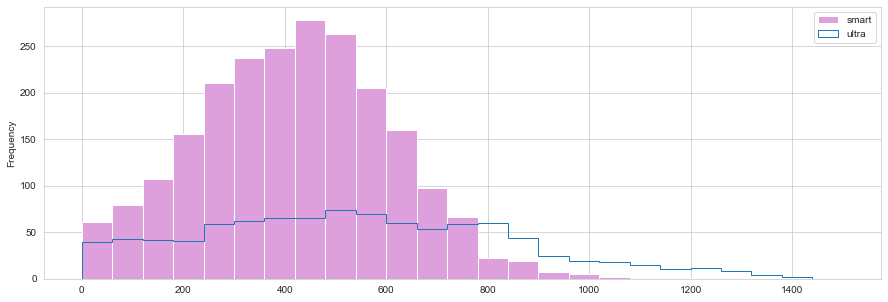

In [143]:
print('Длительность разговоров')
plt.rcParams['figure.figsize'] = [15, 5] 
ax = df[df['index']=='smart'].plot(kind='hist', y='call_duration', histtype='barstacked',color='plum' ,range=(0, 1500 ), bins=25, label='smart')
df[df['index']=='ultra'].plot(kind='hist', y='call_duration', histtype='step', range=(0, 1500 ), bins=25,label='ultra', ax=ax, grid=True, legend=True)
plt.show()

Использованный трафик


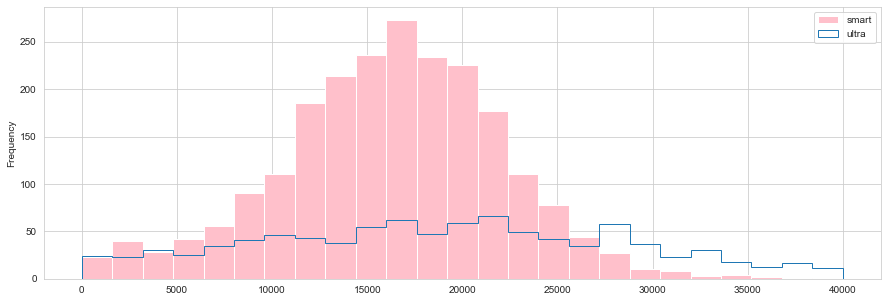

In [145]:
print('Использованный трафик')
plt.rcParams['figure.figsize'] = [15, 5] 
ax = df[df['index']=='smart'].plot(kind='hist',y='mb_used',range=(0, 40000), histtype='barstacked',color='pink', bins=25, label = 'smart')
df[df['index']=='ultra'].plot(kind='hist',y='mb_used', ax=ax, range=(0, 40000), histtype='step',bins=25, label='ultra')
plt.show()

Количество отправленных смс


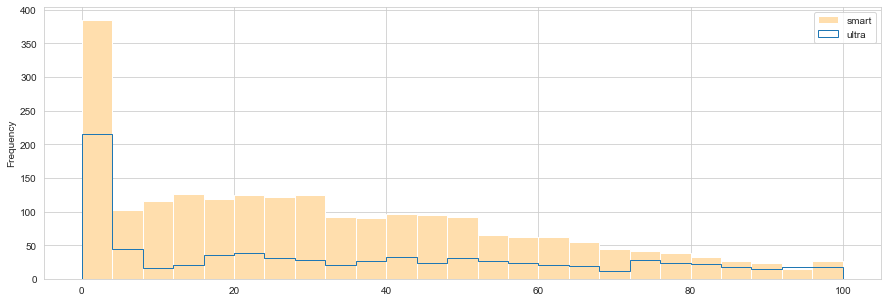

In [146]:
print('Количество отправленных смс')
plt.rcParams['figure.figsize'] = [15, 5] 
ax = df[df['index']=='smart'].plot(kind='hist',y='messages_count', bins=25, label='smart', range=(0,100), histtype='barstacked', color='navajowhite')
df[df['index']=='ultra'].plot(kind='hist', y='messages_count', bins=25, range=(0,100), histtype='step', label='ultra', ax=ax)
plt.show()

In [147]:
print('Тариф smart: ')
print('Параметр: call_duration', '| ' 'Среднее значение:', round(df[df['index']=='smart']['call_duration'].mean(),2), '| ', 'Дисперсия: ', round(np.var(df[df['index']=='smart']['call_duration'], ddof=1),2), '| ', 'Ст.отклонение: ', round(df[df['index']=='smart']['call_duration'].std(),2))
print('Параметр: mb_used', '| ' 'Среднее значение:', round(df[df['index']=='smart']['mb_used'].mean(),2), '| ', 'Дисперсия: ', round(np.var(df[df['index']=='smart']['mb_used'], ddof=1),2), '| ', 'Ст.отклонение: ', round(df[df['index']=='smart']['mb_used'].std(),2))
print('Параметр: messages_count', '| ' 'Среднее значение:', round(df[df['index']=='smart']['messages_count'].mean(),2), '| ', 'Дисперсия: ', round(np.var(df[df['index']=='smart']['messages_count'], ddof=1),2), '| ', 'Ст.отклонение: ', round(df[df['index']=='smart']['messages_count'].std(),2))

Тариф smart: 
Параметр: call_duration | Среднее значение: 419.06 |  Дисперсия:  35844.19 |  Ст.отклонение:  189.33
Параметр: mb_used | Среднее значение: 16230.17 |  Дисперсия:  34613960.71 |  Ст.отклонение:  5883.36
Параметр: messages_count | Среднее значение: 33.4 |  Дисперсия:  798.6 |  Ст.отклонение:  28.26


In [148]:
print('Тариф ultra: ')
print('Параметр: call_duration', '| ' 'Среднее значение:', round(df[df['index']=='ultra']['call_duration'].mean(),2), '| ', 'Дисперсия: ', round(np.var(df[df['index']=='ultra']['call_duration'], ddof=1),2), '| ', 'Ст.отклонение: ', round(df[df['index']=='ultra']['call_duration'].std(),2))
print('Параметр: mb_used', '| ' 'Среднее значение:', round(df[df['index']=='ultra']['mb_used'].mean(),2), '| ', 'Дисперсия: ', round(np.var(df[df['index']=='ultra']['mb_used'], ddof=1),2), '| ', 'Ст.отклонение: ', round(df[df['index']=='ultra']['mb_used'].std(),2))
print('Параметр: messages_count', '| ' 'Среднее значение:', round(df[df['index']=='ultra']['messages_count'].mean(),2), '| ', 'Дисперсия: ', round(np.var(df[df['index']=='ultra']['messages_count'], ddof=1),2), '| ', 'Ст.отклонение: ', round(df[df['index']=='ultra']['messages_count'].std(),2))

Тариф ultra: 
Параметр: call_duration | Среднее значение: 545.45 |  Дисперсия:  94203.42 |  Ст.отклонение:  306.93
Параметр: mb_used | Среднее значение: 19480.54 |  Дисперсия:  102737911.08 |  Ст.отклонение:  10135.97
Параметр: messages_count | Среднее значение: 49.03 |  Дисперсия:  2198.73 |  Ст.отклонение:  46.89


In [149]:
print('Средняя выручка по абонентам smart:',round(df[df['index']=='smart']['expenses'].mean(),2))  
print('Средняя выручка по абонентам ultra:',round(df[df['index']=='ultra']['expenses'].mean(),2))

Средняя выручка по абонентам smart: 1306.37
Средняя выручка по абонентам ultra: 2073.97


In [150]:
df.index.value_counts()

2047    1
541     1
537     1
2584    1
533     1
       ..
3099    1
1050    1
3095    1
1046    1
0       1
Length: 3174, dtype: int64

Количество пользователей, использующих дешё вый тариф smart больше, чем пользователей ultra (2223 против 951)\
Приблизительно 50% пользователей с этим тарифом укладывется в предоплаченные минуты разговора, интернет и количество смс(500 минут разговора, 50 сообщений и 15 Гб), остальные - нет.
- Гистограмма длительности разговоров имеет нормальное распределение (влево перекос).
- Гистограмма использования интернета имеет нормальное распределение (без скосов).
Пользователи более дорогого тарифа (ultra) не имеют выраженного смещения по объёмам использования предоплаченных услуг.
Гистограмма длительности разговоров пользователей тарифа ultra имеет нормальное распределение (перекос вправо).

Таким образом, мы можем сделать вывод, что пользователи тарифа ultra лишь незначительно активнее используют предоплаченные услуги и более выгодны для оператора. Однако пользователи более дешёвого тарифа чаще не укладываются в объёмы предоплаченных услуг и за счёт этого, разница сокращается: 
средняя выручка двух тарифов различается примерно на 700р. (1306,37 vs 2073,97),  в то время как сами тарифы различаются на 1400р.

# 4. Проверка гипотез

Проверьте гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
Пороговое значение alpha задайте самостоятельно.\
Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.


In [151]:
from scipy import stats as st

In [156]:
alpha=0.5
results = st.ttest_ind(df[df['index']=='smart']['expenses'], df[df['index']=='ultra']['expenses'])

In [157]:
pvalue= results.pvalue
pvalue

5.859359959437306e-146

In [158]:
if (pvalue<alpha):
    print('Отклоняем нулевую гипотезу о равности тарифов смарт и ультра: они по-разному влияют на выручку')
else:
    print('Нет оснований отклонять нулевую гипотезу: тарифы смарт и ультра не оказывают различия на выручку')

Отклоняем нулевую гипотезу о равности тарифов смарт и ультра: они по-разному влияют на выручку


In [159]:
results2 = st.ttest_ind(df[df['city']=='Москва']['expenses'], df[df['city']!='Москва']['expenses'])

In [160]:
pvalue2 = results2.pvalue
pvalue2

0.5025458111268286

In [161]:
if (pvalue2<alpha):
    print('Отклоняем нулевую гипотезу: ср.выручка пользователей из Москвы и регионов различается')
else:
    print('Нет оснований отклонять нулевую гипотезу: разницы между выручкой пользователей из Москвы и регионов нет')

Нет оснований отклонять нулевую гипотезу: разницы между выручкой пользователей из Москвы и регионов нет


Таким образом, мы проверили гипотезы и пришли к следующим выводам:  

1) Средняя выручка пользователей тарифов «Ультра» и «Смарт» действительно различается;\
2) Различий в средней выручке пользователей из Москвы и регионов - нет. 